In [1]:
#importing libarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer

## Gathering Data


In [2]:
#loading the twitter-archive-enhanced.csv
twitter_archive = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [3]:
# creaing a request to extract Image-predictions.tsv file and storing it in data floder
try:
    r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

    with open('./data/image-predictions.tsv', mode='wb') as file:
        file.write(r.content)
except:
    print("error")

In [4]:
#loading image prediction tsv file and seprating it with "/t" as it is tab seprated values
image_pred = pd.read_csv('./data/image-predictions.tsv', sep='\t')

In [5]:
try:
    consumer_key = 'zGtdXa19dWZ2Y3ZzAAJK5l7AW'
    consumer_secret = '3N2ZrxXA0EaUaa8mNX5CBCDwKaLdkQIzE6ayre3DPKSi7F527b'
    access_token = '988335209795018752-DQ7zZj6Pk4Y3dBo1eeGSAOsU5TtvWZR'
    access_secret = 'Wjj5m1RG5dDzEgvvxkKkjTEnGS89En6UB19o3qSQ8wCkH'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)
except:
    print("error")

In [ ]:
try:
    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('./data/tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)
except:
    print("error")

In [9]:
try:
    #creating a list
    tweets_data = []
    
    #opening the Tweet_Json file 
    tweet_file = open('./data/tweet_json.txt', "r")
    
    
    # For loop to append each tweet into a list
    for line in tweet_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

    tweet_file.close()
except:
    print("error")

In [10]:
try:
    # Create tweet_info DataFrame
    tweet_info = pd.DataFrame()
    #adding the required column in the dataframe
    tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
    tweet_info['retweets'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
    tweet_info['favourites'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
except:
    print("error")

## Assessing Data


### Access twitter_archive

In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Observations:
   >1. Missing data in the following columns:
                a. in_reply_to_status_id
                b. in_reply_to_user_id
                c. retweeted_status_id
                d.retweeted_status_user_id
                e. retweeted_status_timestamp
                f. expanded_urls
2. Timestamp and retweeted_status_timestamp is an object
3. Source columns have HTML tags
4. This dataset includes retweets, which means there is duplicated data


In [13]:
# checks for duplicated entries for tweet id in twitter_archive
twitter_archive.tweet_id.duplicated().sum()

0

## Observations:
   > 1. No duplicate entries found

In [14]:
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
quite            4
just             4
not              2
actually         2
mad              2
getting          2
unacceptable     1
officially       1
life             1
such             1
by               1
infuriating      1
this             1
incredibly       1
space            1
old              1
light            1
my               1
his              1
all              1
Name: name, dtype: int64

In [15]:
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


### Access image_pred_df

In [16]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



**dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase**

In [17]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Observations:
   >1.  No Null values found.
2.  All datatypes are correct.

In [18]:
# checks for duplicated entries in image_pred_df
image_pred.tweet_id.duplicated().sum()

0

## Observations:
   > 1. No duplicate entries found.

In [19]:
image_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Observations:
   > 1. No Null Values found.

In [20]:
# checks for duplicated entries in jpg_url
image_pred.jpg_url.duplicated().sum()

66

## Observations:
   >1. There are total 66 duplicate entries found in the "image_prediction.tsv" file

In [21]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### Access tweet_counts

In [22]:
tweet_info.head()

,tweet_id,retweets,favourites
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


In [23]:
tweet_info.sample(20)

,tweet_id,retweets,favourites
2205,668614819948453888,339,644
117,869772420881756160,10540,43430
1102,734559631394082816,448,1634
800,772102971039580160,1057,4424
2057,671159727754231808,89,397
267,841077006473256960,5939,24758
1537,689557536375177216,515,2246
813,770655142660169732,1988,8069
1597,685943807276412928,688,1788
1668,682259524040966145,1369,4549


In [24]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 3 columns):
tweet_id      2350 non-null int64
retweets      2350 non-null int64
favourites    2350 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Observations:
   > 1. No null values found
2. All datatypes are correct

In [25]:
tweet_info.isnull().sum()

tweet_id      0
retweets      0
favourites    0
dtype: int64

### Observations:
   > 1.No Null v

In [26]:
tweet_info.describe()

,tweet_id,retweets,favourites
count,2.350000e+03,2350.000000,2350.000000
mean,7.425233e+17,3104.064681,8110.702553
std,6.844886e+16,5138.133282,12033.993390
min,6.660209e+17,0.000000,0.000000
25%,6.783910e+17,617.000000,1418.000000
50%,7.193360e+17,1447.500000,3589.000000
75%,7.989319e+17,3612.250000,10108.250000
max,8.924206e+17,78839.000000,131922.000000


## Observations:
### Quality Issues
   > **twitter_archive:**
       > 1. Missing data in the following columns:
                    a. in_reply_to_status_id
                    b. in_reply_to_user_id
                    c. retweeted_status_id
                    d.retweeted_status_user_id
                    e. retweeted_status_timestamp
                    f. expanded_urls
2. Timestamp and retweeted_status_timestamp is an object
3. Source columns have HTML tags
4. This dataset includes retweets, which means there is duplicated data
5. Some of the rows have invalid strings in the name column, e.g. "a", "an", "in".
>
> ##### **image_pred**:
      1.dog breeds are not consistently in p1,p2,p3 columns
>
> ##### **tweet_info:**
      1. id column name to be changed from id
      
### Tidiness Issues
   > 1. Image_predictions and twwet_json files both has to be joined with Twitter_archive file.
2. Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

## Cleaning Data


**DEFINE-CODE-TEST**

1. Creates a predicted dog breed column, based on the the confidence level of minimum 30% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'
3. Update id name in tweet_info to tweet_id
3. Convert the tweet_id in tweet_info into int64 type for merging.
4. Merge the copied archive, image_pred, and tweet_info dataframes
5. Convert the tweet_id in master_df into object type
6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column
7. Remove Inconsistency in pred_breed
8. Delete retweets
9. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
10. Change the timestamp to correct datetime format
11. Removing HTML tags from source column
12. Standardize dog ratings


In [28]:
#coping files
archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
tweet_counts_clean = tweet_info.copy()

**CODE**

In [29]:
image_pred_clean.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
847,695409464418041856,https://pbs.twimg.com/media/CaaXN5LUYAEzAh-.jpg,1,pug,0.997445,True,bull_mastiff,0.001749,True,Pekinese,0.000304,True
70,667192066997374976,https://pbs.twimg.com/media/CUJXpRBXIAAN0yz.jpg,1,Rottweiler,0.283640,True,miniature_pinscher,0.148112,True,black-and-tan_coonhound,0.095585,True
445,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,1,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
65,667174963120574464,https://pbs.twimg.com/media/CUJIFoJWsAAL3Dc.jpg,1,toy_poodle,0.266437,True,Chihuahua,0.243223,True,bluetick,0.072806,True


**1. Creates a predicted dog breed column, based on the the confidence level of minimum 30% and 'p1_dog', 'p2_dog' and 'p3_dog' statements**

In [30]:
try:
    #Creates a predicted dog breed column, based on the the confidence level of minimum 30% and 'p1_dog', 'p2_dog' and 'p3_dog' statements
    image_pred_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.3
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.3
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.3
                     else np.nan for index, df in image_pred_clean.iterrows()]
except:
    print("error")

In [31]:
try:
    ## Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
    image_pred_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)
except:
    print("error")

In [32]:
image_pred_clean.head(5)

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


## Observations:
   > 1. 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns form inage_pred is dropped successfully.

**2. Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'**

In [33]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [34]:
try:
    #replacing NaN values and None with blank space 
    archive_clean.doggo.replace(np.NaN, '', inplace=True)
    archive_clean.floofer.replace(np.NaN, '', inplace=True)
    archive_clean.pupper.replace(np.NaN, '', inplace=True)
    archive_clean.puppo.replace(np.NaN, '', inplace=True)
    archive_clean.doggo.replace('None', '', inplace=True)
    archive_clean.floofer.replace('None', '', inplace=True)
    archive_clean.pupper.replace('None', '', inplace=True)
    archive_clean.puppo.replace('None', '', inplace=True)
except:
    print("error")

In [35]:
try:
    archive_clean['stage'] = archive_clean.doggo + twitter_archive.floofer + archive_clean.pupper + archive_clean.puppo
    archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
    archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
    archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
except:
    print("error")

In [311]:
try:
    # Convert the stage in archive_clean into categorical dtype
    archive_clean['stage'] = archive_clean['stage'].astype('category')
except:
    print("error")

In [36]:
try:
    # drop 'doggo', 'floofer', 'pupper', 'puppo' columns
    archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
    archive_clean.stage.replace('', np.nan, inplace=True)
except:
    print("error")

In [37]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [38]:
tweet_counts_clean.head()

,tweet_id,retweets,favourites
0,892420643555336193,8795,39370
1,892177421306343426,6448,33698
2,891815181378084864,4273,25394
3,891689557279858688,8884,42743
4,891327558926688256,9668,40904


**4. Merge the copied archive_clean, image_pred_clean, and tweet_info dataframes**


In [39]:
try:
    from functools import reduce
    df = [archive_clean, image_pred_clean, tweet_counts_clean]
    master_df = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), df)
except:
    print("error")

In [40]:
master_df.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweets,favourites
735,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,NaN,430,2984
847,744709971296780288,NaN,NaN,2016-06-20 01:54:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harvey. He's stealthy af. 10/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744709971...,10,10,Harvey,None,https://pbs.twimg.com/media/ClW9w7mWEAEFN1k.jpg,1,NaN,1752,6113
707,761334018830917632,NaN,NaN,2016-08-04 22:52:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. I really want to hear the joke ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761334018...,10,10,Bruce,None,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,1,Norwegian_elkhound,1649,5750
1332,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,NaN,567,2359
571,783821107061198850,NaN,NaN,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,None,https://pbs.twimg.com/media/CuCxIzyWEAQTnQA.jpg,1,NaN,2252,8162
1931,668542336805281792,NaN,NaN,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",There's a lot going on here but in my honest o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668542336...,10,10,None,None,https://pbs.twimg.com/media/CUcjtL8WUAAAJoz.jpg,1,NaN,230,491


In [41]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 19 columns):
tweet_id                      2071 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2071 non-null object
source                        2071 non-null object
text                          2071 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2071 non-null object
rating_numerator              2071 non-null int64
rating_denominator            2071 non-null int64
name                          2071 non-null object
stage                         2071 non-null object
jpg_url                       2071 non-null object
img_num                       2071 non-null int64
pred_breed                    1312 non-null object
retweets                      2071 n

**5. Convert the tweet_id in master_df into object type**

In [42]:
try:
    master_df['tweet_id'] = master_df['tweet_id'].astype('object')
except:
    print("error")

In [43]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 19 columns):
tweet_id                      2071 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2071 non-null object
source                        2071 non-null object
text                          2071 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2071 non-null object
rating_numerator              2071 non-null int64
rating_denominator            2071 non-null int64
name                          2071 non-null object
stage                         2071 non-null object
jpg_url                       2071 non-null object
img_num                       2071 non-null int64
pred_breed                    1312 non-null object
retweets                      2071 

**6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column**

In [44]:
try:
    term = master_df[master_df.name.str.islower()].name.unique()
except:
    print("error")

In [45]:
try:
    master_df['name'] = master_df['name'].replace(term, np.nan)
    master_df['name'] = master_df['name'].replace('None', np.nan)
except:
    print("error")

In [46]:
master_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
32           Lilly
34            Earl
35            Lola
36           Kevin
           ...    
1984          Dook
1986          Hall
1987      Philippe
1990         Reese
1991       Cupcake
1995         Biden
1996          Fwed
1998     Genevieve
1999        Joshwa
2002       Timison
2005      Clarence
2006       Kenneth
2007       Churlie
2008       Bradlay
2009         Pipsy
2011          Gabe
2012         Clybe
2013          Dave
2015          Keet
2017        Klevin
2018         Carll
2023        

**TEST**

In [47]:
master_df.name.value_counts()

Charlie      11
Cooper       10
Oliver       10
Tucker       10
Lucy         10
Penny        10
Lola          8
Bo            8
Sadie         8
Winston       8
Toby          7
Daisy         7
Jax           6
Koda          6
Rusty         6
Bella         6
Stanley       6
Bailey        6
Scout         6
Milo          6
Dave          6
Buddy         5
Leo           5
Alfie         5
Larry         5
Oscar         5
Louis         5
Chester       5
George        4
Finn          4
             ..
Chloe         1
Pepper        1
Chevy         1
Anthony       1
Darrel        1
Tycho         1
Sundance      1
Furzey        1
Kaiya         1
Durg          1
Sprout        1
Gerbald       1
Skittles      1
Kial          1
Adele         1
Doobert       1
Lugan         1
Binky         1
Rambo         1
Bonaparte     1
Cheryl        1
Bones         1
Lorelei       1
Bruiser       1
Dixie         1
Lolo          1
William       1
Maude         1
Ulysses       1
Jackie        1
Name: name, Length: 913,

**7. Remove Inconsistency in pred_bread**

In [48]:
try:
    master_df['pred_breed'] = master_df['pred_breed'].astype('str')
    master_df['pred_breed'] = master_df['pred_breed'].str.lower().str.replace('_', ' ').str.replace('-', ' ')
    master_df['pred_breed'] = master_df['pred_breed'].replace('nan', np.nan)
except:
    print("error")

In [49]:
master_df['pred_breed'].value_counts()[:5]

golden retriever      138
labrador retriever     93
pembroke               84
chihuahua              67
pug                    53
Name: pred_breed, dtype: int64

**8. Delete Retweets**

In [50]:
try:
    # Delete the rows which contains retweets
    master_df = master_df.drop(master_df[(master_df['in_reply_to_status_id'].isnull() == False) | (master_df['retweeted_status_id'].isnull() == False)].index)
except:
    print("error")

In [51]:
master_df.shape

(1971, 19)

**9. Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp**

In [52]:
try:
    # drop the reply status and retweet status columns
    master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
           'retweeted_status_timestamp'], axis=1, inplace=True)
except:
    print("error")

In [53]:
master_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'retweets', 'favourites'],
      dtype='object')

In [54]:
try:
    print(master_df['expanded_urls'].isnull().sum())
except:
    print("error")

0


No missing values in expanded_urls now after removing 'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp' columns

In [55]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2070
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
pred_breed            1257 non-null object
retweets              1971 non-null int64
favourites            1971 non-null int64
dtypes: int64(5), object(9)
memory usage: 231.0+ KB


**10. Change the timestamp to correct datetime format**

In [56]:
try:
    master_df.sample(1)['timestamp']
except:
    print("error")

In [57]:
try:
    master_df['timestamp'] = pd.to_datetime(master_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
except:
    print("error")

In [58]:
master_df.sample(3)['timestamp']

61    2017-06-25 18:56:45
842   2016-06-22 01:06:43
9     2017-07-26 15:59:51
Name: timestamp, dtype: datetime64[ns]

In [59]:
master_df['timestamp'].describe()

count                    1971
unique                   1971
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

**11. Removing HTML tags from source column**

In [60]:
try:
    href = master_df["source"].str.split('"', expand = True)
    master_df["source"] = href[1]
except:
    print("error")

In [61]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweets,favourites
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8795,39370
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,6448,33698
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,4273,25394
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,8884,42743
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9668,40904


In [62]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2070
Data columns (total 14 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1349 non-null object
stage                 1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
pred_breed            1257 non-null object
retweets              1971 non-null int64
favourites            1971 non-null int64
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 231.0+ KB


**12. Standardize dog ratings**

In [63]:
try:
    ratings = master_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
except:
    print("error")

In [64]:
try:
    master_df.rating_numerator = ratings
    master_df['rating_numerator'] = master_df['rating_numerator'].astype('float64')
except:
    print("error")

In [65]:
try:
    # standardizing to a denominator of 10 for groups of dogs:

    rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                               else num for num, denom in zip(master_df['rating_numerator'], master_df['rating_denominator'])]
    rating_denom = [10 if denom != 10 and num/denom <= 2
                                 else denom for num, denom in zip(master_df['rating_numerator'], master_df['rating_denominator'])]
    master_df['rating_numerator'] = rating_num
    master_df['rating_denominator'] = rating_denom

    master_df = master_df.drop(master_df[((master_df['rating_denominator'] != 10) | (master_df['rating_numerator'] > 20))].index)
except:
    print("error")

In [66]:
master_df[['rating_numerator', 'rating_denominator']].skew()

rating_numerator     -1.457979
rating_denominator    0.000000
dtype: float64

In [67]:
master_df['rating_numerator'].unique()

array([13.  , 12.  , 14.  , 13.5 , 11.  ,  6.  , 10.  ,  0.  ,  9.75,
        5.  , 11.27,  3.  ,  7.  ,  8.  ,  9.  ,  4.  ,  2.  , 11.26,
        1.  ])

In [68]:
master_df['rating_denominator'].unique()

array([10], dtype=int64)

In [69]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2070
Data columns (total 14 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1347 non-null object
stage                 1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
pred_breed            1256 non-null object
retweets              1968 non-null int64
favourites            1968 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(8)
memory usage: 230.6+ KB


## Storing, Analyzing, and Visualizing Data

In [70]:
try:
    # storing master dataframe as csv
    master_df.to_csv('./data/clean_twitter_archive.csv', encoding='utf-8', index=False)
except:
    print("error")

In [71]:
# read master_archive.csv
df = pd.read_csv('./data/clean_Twitter_archive.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 14 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null object
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1347 non-null object
stage                 1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
pred_breed            1256 non-null object
retweets              1968 non-null int64
favourites            1968 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 215.3+ KB


In [72]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweets,favourites
count,1.968000e+03,1968.000000,1968.0,1968.000000,1968.000000,1968.000000
mean,7.360298e+17,10.534949,10.0,1.202236,2777.623476,8960.954268
std,6.754171e+16,2.178525,0.0,0.559391,4756.966749,12502.223165
min,6.660209e+17,0.000000,10.0,1.000000,14.000000,81.000000
25%,6.758719e+17,10.000000,10.0,1.000000,624.000000,1972.500000
50%,7.088226e+17,11.000000,10.0,1.000000,1355.000000,4113.500000
75%,7.880674e+17,12.000000,10.0,1.000000,3209.250000,11331.500000
max,8.924206e+17,14.000000,10.0,4.000000,78839.000000,131922.000000


In [73]:
max_tweets = df['retweets'].max()
print("the max no of tweets are: {}".format(max_tweets))
min_tweets = df['retweets'].min()
print("the max no of tweets are: {}".format(min_tweets))

the max no of tweets are: 78839
the max no of tweets are: 14



### Which rating was given to most of the dogs?

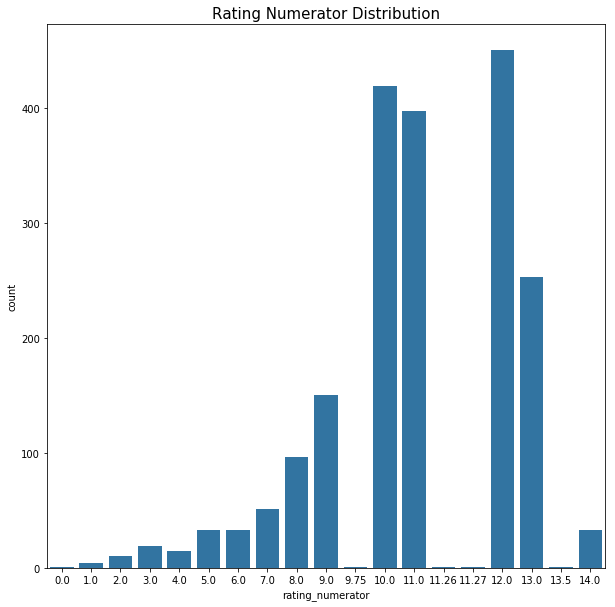

In [74]:
try:
    plt.figure(figsize=(10,10))
    plt.title ('Rating Numerator Distribution', size=15)
    plt.xlabel('Rating Numerator')
    plt.ylabel('Number of Ratings')
    base_color = sns.color_palette()[0]
    sns.countplot(data = df, x = 'rating_numerator', color = base_color)
except:
    print("error")

### Observations:
  > 1. Most of the dogs get rating_numerator in between 10-13
2. There is very few dogs even 1 or 2 with rating 0 and numerator rating as float

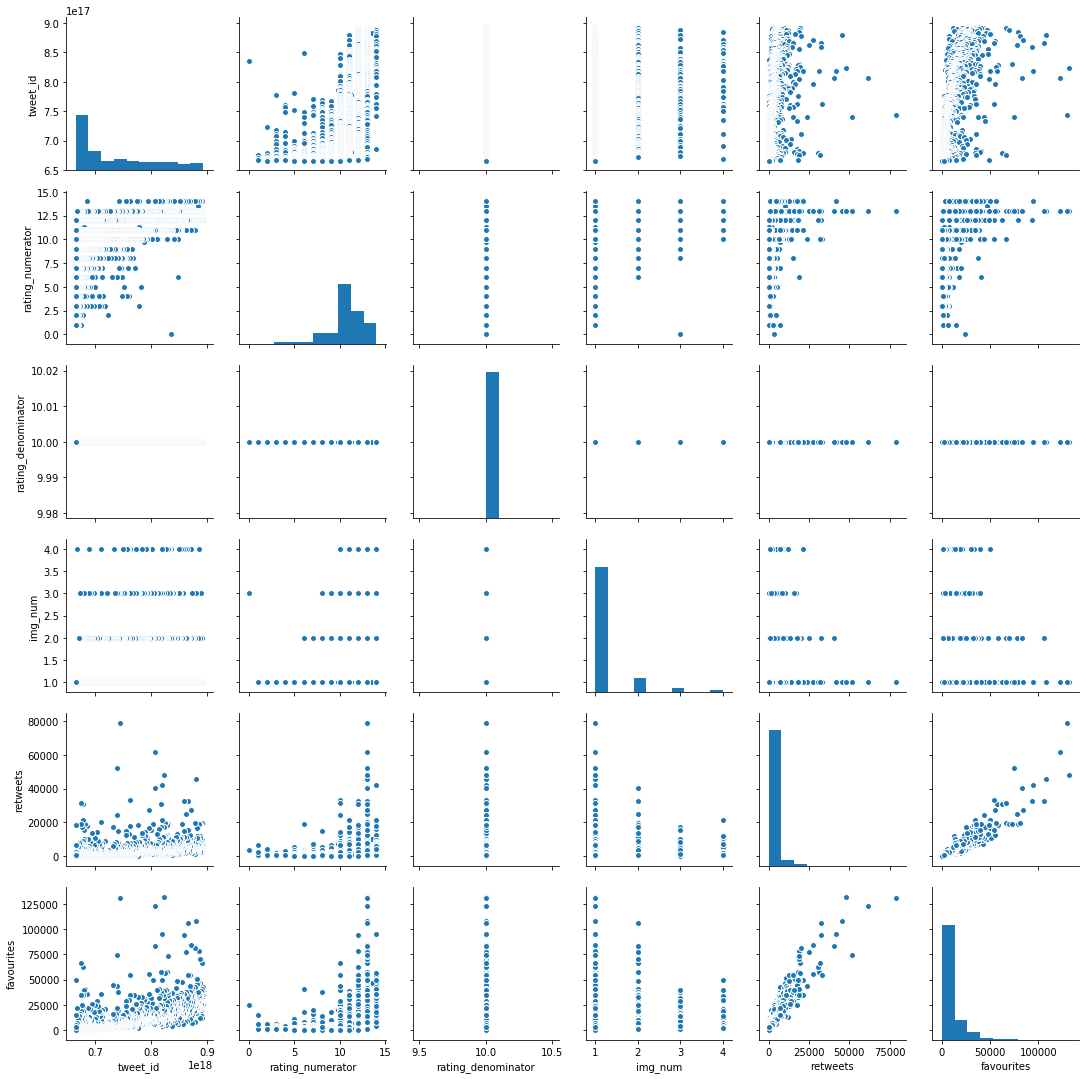

In [75]:
sns.pairplot(data= df)

### Observations:
   > 1. Rating_numerator vs favourites/retweets are right skewed.
2. Retweets vs  favourites is linear positive.


### What are the 10 most frequent predicted dog breeds?


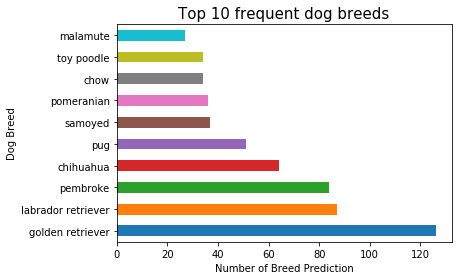

In [76]:
try:
    df['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'barh')
    plt.xlabel('Number of Breed Prediction')
    plt.title('Top 10 frequent dog breeds', size=15)
    plt.ylabel('Dog Breed')
    plt.plot();
except:
    print("error")

### Observations:
  > 1. Most of the dogs have golden retriever, labrador retriever as breed which all are rated.    

## Conclusion

> 1. Most of the dogs get rating_numerator in between 10-13
2. There is very few dogs even 1 or 2 with rating 0 and numerator rating as float.
3. Most of the dogs have golden retriever, labrador retriever as breed which all are rated.
4. The max no of tweets are: 78839
5. The max no of tweets are: 14
6. Rating_numerator vs favourites/retweets are right skewed.
7. Retweets vs favourites is linear positive.

In [85]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_report.ipynb'])

4294967295